# Emily Soto -20190508

## Loading Libraries

In [99]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data

In [3]:
df = pd.read_csv('titanic_MD.csv')
df_c=pd.read_csv('titanic.csv')

In [4]:
print('Titanic missing shape:', df.shape)
df.head()

Titanic missing shape: (183, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",?,38.0,1.0,0.0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S


In [5]:
print('Titanic complete data shape:', df_c.shape)
df_c.head()

Titanic complete data shape: (183, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [6]:
print('Summary of numeric columns')
df.describe()

Summary of numeric columns


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,158.000000,180.000000,171.000000,175.000000
mean,455.366120,0.672131,1.191257,35.692532,0.461111,0.461988,78.959191
std,247.052476,0.470725,0.515187,15.640858,0.646122,0.753435,77.026328
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,35.500000,0.000000,0.000000,56.929200
75%,676.000000,1.000000,1.000000,48.000000,1.000000,1.000000,90.539600
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


Hay 7 columnas numéricas, sin embargo, la columna de "Passenger ID" es solo un identificador
por lo que hacer un summary de esta variable no agrega mucho valor 

In [7]:
print('Summary of string columns')
df.describe(include='object')

Summary of string columns


,Name,Sex,Ticket,Cabin,Embarked
count,183,183,183,183,171
unique,183,3,127,133,3
top,"Futrelle, Mr. Jacques Heath",male,113760,G6,S
freq,1,68,4,4,110


Hay 5 columnas categóricas: nombre, sexo, ticket, cabina y si embarque. Las variables sexo y embarcó se presupone que son variables binarias, así que seguramente hay algún objeto como "?" que provoca que el unique sea de 3.

## 1. Missing Data

Ejemplos:
* NA
* NULL
* blank
* 0, 99, 999

## Pregunta 1

Finding NAs in the dataset

In [16]:
np.unique(df['Sex'])

array(['?', 'female', 'male'], dtype=object)

In [8]:
df.isna().sum() #or df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked       12
dtype: int64

En este análisis parece que "Sex" no tiene missing data, se debe a que los valores faltantes realmente sí existen, pero están como "?".

In [19]:
df['Embarked'].value_counts()

S    110
C     59
Q      2
Name: Embarked, dtype: int64

No hay missing data para "Embarked", hay un tipo de embarque clase "Q" que tuvo muy poca frecuencia. Hubo una mala presuposicion anteriormente.

In [20]:
cols = []
val = []
for col in df.select_dtypes(include='object').columns:
    cols.append(col)
    val.append(df[col].str.contains(r'\?').sum())
pd.DataFrame({
    'cols':cols,
    'val':val
})

,cols,val
0,Name,0
1,Sex,51
2,Ticket,0
3,Cabin,0
4,Embarked,0


Como se mencionó anteriormente, para sexo hay valores "?" que están estropenado el dataset. Cambiaremos este tipo de valor a un **NAN**

In [23]:
df.replace(r'\?', np.nan, regex = True, inplace = True)

Se reemplazaron los valores "?" por un NAN para que estos sí sean identificados como valores faltantes.

In [24]:
df.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex            51
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked       12
dtype: int64

Ahora los 51 "?" para 'sex' son identificados como missing values.

In [31]:
df['Embarked'].value_counts()

S    110
C     59
Q      2
Name: Embarked, dtype: int64

In [32]:
df['Pclass'].value_counts()

1    158
2     15
3     10
Name: Pclass, dtype: int64

In [33]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,93,0,1,"Chaffee, Mr. Herbert Fuller",NaN,46.0,NaN,0.0,W.E.P. 5734,61.1750,E31,NaN
36,216,1,1,"Newell, Miss. Madeleine",female,31.0,1.0,0.0,35273,113.2750,D36,NaN
44,258,1,1,"Cherry, Miss. Gladys",NaN,30.0,0.0,0.0,110152,NaN,B77,NaN
68,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0.0,0.0,16966,134.5000,E40,NaN
70,341,1,2,"Navratil, Master. Edmond Roger",NaN,NaN,1.0,1.0,230080,26.0000,F2,NaN
103,513,1,1,"McGough, Mr. James Robert",male,NaN,0.0,0.0,PC 17473,26.2875,E25,NaN
107,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,NaN,0.0,1.0,111361,57.9792,B18,NaN
121,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",NaN,NaN,1.0,1.0,13567,NaN,B41,NaN
125,619,1,2,"Becker, Miss. Marion Louise",NaN,4.0,2.0,1.0,230136,39.0000,F4,NaN
138,682,1,1,"Hassab, Mr. Hammad",male,27.0,0.0,0.0,PC 17572,76.7292,D49,NaN


## Pregunta 2

## Se presupone que los mejores modelos por columna serían:
- 1. **PassengerID**: No se utilizará ningún modelo ya que no aporta valor al análisis
-  2. **Survived**: No hay missing values. Es una variable dummy por lo que no se necesita un modelaje.
- 3. **Pclass**: No hay missing values. Es una variable con 3 valores únicos (clase baja, media o alta), por lo que no se necesita un modelaje.
- 4. **Name**: No se utilizará ningún modelo ya que no aporta valor al análisis
- 5. **Sex**: Se aprovechará la existencia de la variable "Name" que permite utilizar "Filling values  with information available" y rellenar el missing data con REGEX y un ifelse que identifiqué si en "Name" está el patrón "Mr" que le asignará "male" y de lo contrario será "female".
- 6. **Age**: Para esta variable se utilizaría imputación por la media del grupo. Estos grupos o clusters serían por una variable con la que 'Age' tenga alta correlación, por ejemplo, Sex o Pclass.
- 7. **SibSp**: Solo hay 3 datos de 183 que no contienen valores, es decir, solo 3 pasajeros no indicaron el número de hermanos/esposa, por lo que para esta columna se puede hacer un treshold en el que si los missing data son menores a 10%, se hará un dropp de esa fila (Listwise)
- 8. **Parch**: En este caso hay 12 valores nulos, entonces para imputar el número de Parents/children se podría utilizar el modelo de Pairwise
- 9. **Ticket**: No hay missing values, además, es solamente un identificador para el ticket comprado por lo que no paorta valor al análisis, a menos que se quiera hacer una regla de asociacion con él.
- 10. **Fare**: La tarifa podría tener una alta correlación con la variable "Pclass" por lo que se utilizaría una regresión para asignar este valor.
- 11. **Cabin**: No hay missing values.
- 12. **Embarked**: Se haría una imputación por la mediana para evitar los sesgos.

## Pregunta 3

In [40]:
not_NAN_rows=df[df[['Sex','Age','SibSp', 'Parch','Fare', 'Embarked']].notnull().all(1)]
not_NAN_rows.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
5,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.0000,D56,S
9,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0.0,1.0,113509,61.9792,B30,C
10,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1.0,0.0,36973,83.4750,C83,S


In [44]:
not_NAN_rows.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,467.120000,0.620000,1.160000,36.124200,0.44000,0.480000,74.445126
std,230.014944,0.487832,0.465366,15.123837,0.53786,0.731402,65.975260
min,4.000000,0.000000,1.000000,0.920000,0.00000,0.000000,0.000000
25%,316.750000,0.000000,1.000000,24.000000,0.00000,0.000000,31.990600
50%,480.500000,1.000000,1.000000,36.000000,0.00000,0.000000,59.979200
75%,649.500000,1.000000,1.000000,48.250000,1.00000,1.000000,90.000000
max,868.000000,1.000000,3.000000,71.000000,2.00000,2.000000,512.329200


Hay solamente 100 filas que están completas y tomando en cuenta que antes habían 183 filas, significa que haciendo un Listwise se perdería un 45% de los datos. 

In [45]:
df.dropna().shape

(100, 12)

## Pregunta 4

### Con imputación
Sex            51 -> moda
Age            25 -> las 3
SibSp           3 -> moda
Parch          12 -> moda
Fare            8 -> las 3
Embarked       12 -> moda

In [48]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

### Sex

In [52]:
df['Sex_moda'] = imp_mode.fit_transform(df[['Sex']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_moda
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,C85,C,male
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,female
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,male
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S,female
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S,female


### Age

In [53]:
df['Age_median'] = imp_median.fit_transform(df[['Age']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_moda,Age_median
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,C85,C,male,38.0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,female,35.0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,male,54.0
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S,female,35.5
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S,female,58.0


In [54]:
df['Age_mean'] = imp_mean.fit_transform(df[['Age']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_moda,Age_median,Age_mean
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,C85,C,male,38.0,38.000000
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,female,35.0,35.000000
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,male,54.0,54.000000
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S,female,35.5,35.692532
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S,female,58.0,58.000000


In [55]:
df['Age_mode'] = imp_mode.fit_transform(df[['Age']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_moda,Age_median,Age_mean,Age_mode
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,C85,C,male,38.0,38.000000,38.0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,female,35.0,35.000000,35.0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,male,54.0,54.000000,54.0
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S,female,35.5,35.692532,24.0
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S,female,58.0,58.000000,58.0


### SibSP

In [56]:
df['Sipsp_moda'] = imp_mode.fit_transform(df[['SibSp']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_moda,Age_median,Age_mean,Age_mode,Sipsp_moda
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,C85,C,male,38.0,38.000000,38.0,1.0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,female,35.0,35.000000,35.0,1.0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,male,54.0,54.000000,54.0,0.0
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S,female,35.5,35.692532,24.0,1.0
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S,female,58.0,58.000000,58.0,0.0


### Parch

In [57]:
df['Parch_moda'] = imp_mode.fit_transform(df[['Parch']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_moda,Age_median,Age_mean,Age_mode,Sipsp_moda,Parch_moda
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,C85,C,male,38.0,38.000000,38.0,1.0,0.0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,female,35.0,35.000000,35.0,1.0,0.0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,male,54.0,54.000000,54.0,0.0,0.0
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S,female,35.5,35.692532,24.0,1.0,0.0
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S,female,58.0,58.000000,58.0,0.0,0.0


### Fare

In [58]:
df['Fare_median'] = imp_median.fit_transform(df[['Fare']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_moda,Age_median,Age_mean,Age_mode,Sipsp_moda,Parch_moda,Fare_median
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,C85,C,male,38.0,38.000000,38.0,1.0,0.0,71.2833
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,female,35.0,35.000000,35.0,1.0,0.0,53.1000
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,male,54.0,54.000000,54.0,0.0,0.0,51.8625
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S,female,35.5,35.692532,24.0,1.0,0.0,16.7000
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S,female,58.0,58.000000,58.0,0.0,0.0,26.5500


In [59]:
df['Fare_mean'] = imp_mean.fit_transform(df[['Fare']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_moda,Age_median,Age_mean,Age_mode,Sipsp_moda,Parch_moda,Fare_median,Fare_mean
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,C85,C,male,38.0,38.000000,38.0,1.0,0.0,71.2833,71.2833
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,female,35.0,35.000000,35.0,1.0,0.0,53.1000,53.1000
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,male,54.0,54.000000,54.0,0.0,0.0,51.8625,51.8625
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S,female,35.5,35.692532,24.0,1.0,0.0,16.7000,16.7000
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S,female,58.0,58.000000,58.0,0.0,0.0,26.5500,26.5500


In [60]:
df['Fare_mode'] = imp_mode.fit_transform(df[['Fare']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Sex_moda,Age_median,Age_mean,Age_mode,Sipsp_moda,Parch_moda,Fare_median,Fare_mean,Fare_mode
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,C,male,38.0,38.000000,38.0,1.0,0.0,71.2833,71.2833,71.2833
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,S,female,35.0,35.000000,35.0,1.0,0.0,53.1000,53.1000,53.1000
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,S,male,54.0,54.000000,54.0,0.0,0.0,51.8625,51.8625,51.8625
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,...,S,female,35.5,35.692532,24.0,1.0,0.0,16.7000,16.7000,16.7000
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,S,female,58.0,58.000000,58.0,0.0,0.0,26.5500,26.5500,26.5500


### Cabin

In [61]:
df['Cabin_mode'] = imp_mode.fit_transform(df[['Cabin']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Sex_moda,Age_median,Age_mean,Age_mode,Sipsp_moda,Parch_moda,Fare_median,Fare_mean,Fare_mode,Cabin_mode
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,male,38.0,38.000000,38.0,1.0,0.0,71.2833,71.2833,71.2833,C85
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,female,35.0,35.000000,35.0,1.0,0.0,53.1000,53.1000,53.1000,C123
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,male,54.0,54.000000,54.0,0.0,0.0,51.8625,51.8625,51.8625,E46
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,...,female,35.5,35.692532,24.0,1.0,0.0,16.7000,16.7000,16.7000,G6
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,female,58.0,58.000000,58.0,0.0,0.0,26.5500,26.5500,26.5500,C103


### Embarked

In [62]:
df['Embarked_mode'] = imp_mode.fit_transform(df[['Embarked']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_median,Age_mean,Age_mode,Sipsp_moda,Parch_moda,Fare_median,Fare_mean,Fare_mode,Cabin_mode,Embarked_mode
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,38.0,38.000000,38.0,1.0,0.0,71.2833,71.2833,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,35.0,35.000000,35.0,1.0,0.0,53.1000,53.1000,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,54.0,54.000000,54.0,0.0,0.0,51.8625,51.8625,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,...,35.5,35.692532,24.0,1.0,0.0,16.7000,16.7000,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,58.0,58.000000,58.0,0.0,0.0,26.5500,26.5500,26.5500,C103,S


### Regresión lineal

### Age

In [83]:
lm = LinearRegression()
lm = lm.fit(not_NAN_rows[['Survived']], not_NAN_rows['Age'])
lm

LinearRegression()

In [86]:
df['Age_lm'] = lm.predict(df[['Survived']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Sipsp_moda,Parch_moda,Fare_median,Fare_mean,Fare_mode,Cabin_mode,Embarked_mode,Sex_sector,Sex_lm,Age_lm
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,1.0,0.0,71.2833,71.2833,71.2833,C85,C,female,female,32.176129
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,1.0,0.0,53.1000,53.1000,53.1000,C123,S,female,female,32.176129
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,0.0,0.0,51.8625,51.8625,51.8625,E46,S,male,male,42.565789
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,...,1.0,0.0,16.7000,16.7000,16.7000,G6,S,female,female,32.176129
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,0.0,0.0,26.5500,26.5500,26.5500,C103,S,female,female,32.176129


### SibSp

In [92]:
lm = LinearRegression()
lm = lm.fit(not_NAN_rows[['Survived']], not_NAN_rows['SibSp'])
lm
df['SibSp_lm'] = lm.predict(df[['Survived']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Parch_moda,Fare_median,Fare_mean,Fare_mode,Cabin_mode,Embarked_mode,Sex_sector,Sex_lm,Age_lm,SibSp_lm
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,0.0,71.2833,71.2833,71.2833,C85,C,female,female,32.176129,0.532258
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,0.0,53.1000,53.1000,53.1000,C123,S,female,female,32.176129,0.532258
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,0.0,51.8625,51.8625,51.8625,E46,S,male,male,42.565789,0.289474
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,...,0.0,16.7000,16.7000,16.7000,G6,S,female,female,32.176129,0.532258
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,0.0,26.5500,26.5500,26.5500,C103,S,female,female,32.176129,0.532258


### Parch

In [93]:
lm = LinearRegression()
lm = lm.fit(not_NAN_rows[['Survived']], not_NAN_rows['Parch'])
lm
df['Parch_lm'] = lm.predict(df[['Survived']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_median,Fare_mean,Fare_mode,Cabin_mode,Embarked_mode,Sex_sector,Sex_lm,Age_lm,SibSp_lm,Parch_lm
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,71.2833,71.2833,71.2833,C85,C,female,female,32.176129,0.532258,0.483871
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,53.1000,53.1000,53.1000,C123,S,female,female,32.176129,0.532258,0.483871
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,51.8625,51.8625,51.8625,E46,S,male,male,42.565789,0.289474,0.473684
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,...,16.7000,16.7000,16.7000,G6,S,female,female,32.176129,0.532258,0.483871
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,26.5500,26.5500,26.5500,C103,S,female,female,32.176129,0.532258,0.483871


### Fare

In [94]:
lm = LinearRegression()
lm = lm.fit(not_NAN_rows[['Pclass']], not_NAN_rows['Fare'])
lm
df['Fare_lm'] = lm.predict(df[['Pclass']])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_mean,Fare_mode,Cabin_mode,Embarked_mode,Sex_sector,Sex_lm,Age_lm,SibSp_lm,Parch_lm,Fare_lm
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1.0,0.0,PC 17599,71.2833,...,71.2833,71.2833,C85,C,female,female,32.176129,0.532258,0.483871,81.757479
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,53.1000,53.1000,C123,S,female,female,32.176129,0.532258,0.483871,81.757479
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,...,51.8625,51.8625,E46,S,male,male,42.565789,0.289474,0.473684,81.757479
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,...,16.7000,16.7000,G6,S,female,female,32.176129,0.532258,0.483871,-9.646935
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,...,26.5500,26.5500,C103,S,female,female,32.176129,0.532258,0.483871,81.757479


## Con outliers: Standard deviation approach

### Age

In [97]:
xl = df['Age'].mean() - (df['Age'].std() * 2)
xu = df['Age'].mean() + (df['Age'].std() * 2)
print('Lower value:', xl)
print('Upper value:', xu)

Lower value: 4.410816187965786
Upper value: 66.97424710317347


<AxesSubplot:xlabel='Fare', ylabel='Age'>

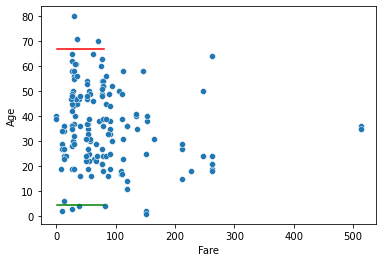

In [100]:
sns.scatterplot(x = df['Fare'], y = df['Age'])
sns.lineplot(x = df['Age'], y = xl, color = 'green')
sns.lineplot(x = df['Age'], y = xu, color = 'red')

In [101]:
df['Age_sd'] = np.where(
    df['Age']<xl,
    xl,
    np.where(
        df['Age']>xu,
        xu,
        df['Age']
    )
)

In [102]:
df_sd = df[(df['Age']>=xl) & (df['Age']<=xu)]
df[['Age', 'Age_sd']].describe()

,Age,Age_sd
count,158.000000,158.000000
mean,35.692532,35.632200
std,15.640858,15.199386
min,0.920000,4.410816
25%,24.000000,24.000000
50%,35.500000,35.500000
75%,48.000000,48.000000
max,80.000000,66.974247


### Fare

In [103]:
xl = df['Fare'].mean() - (df['Fare'].std() * 2)
xu = df['Fare'].mean() + (df['Fare'].std() * 2)
print('Lower value:', xl)
print('Upper value:', xu)

Lower value: -75.09346543091229
Upper value: 233.01184714519795


<AxesSubplot:xlabel='Age', ylabel='Fare'>

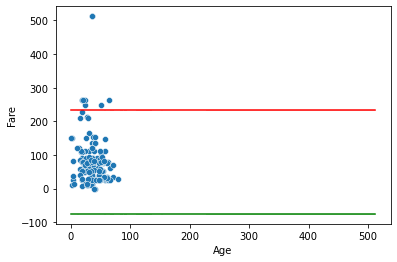

In [104]:
sns.scatterplot(x = df['Age'], y = df['Fare'])
sns.lineplot(x = df['Fare'], y = xl, color = 'green')
sns.lineplot(x = df['Fare'], y = xu, color = 'red')

In [105]:
df['Fare_sd'] = np.where(
    df['Fare']<xl,
    xl,
    np.where(
        df['Fare']>xu,
        xu,
        df['Fare']
    )
)

In [106]:
df_sd = df[(df['Fare']>=xl) & (df['Fare']<=xu)]
df[['Fare', 'Fare_sd']].describe()

,Fare,Fare_sd
count,175.000000,175.000000
mean,78.959191,74.580154
std,77.026328,60.224965
min,0.000000,0.000000
25%,29.700000,29.700000
50%,56.929200,56.929200
75%,90.539600,90.539600
max,512.329200,233.011847


## Con outliers: Percentile approach

### Age

In [107]:
pl = np.nanpercentile(df['Age'], 5)
pu = np.nanpercentile(df['Age'], 95)
print('Lower value:', pl)
print('Upper value:', pu)

Lower value: 13.55
Upper value: 61.150000000000006


<AxesSubplot:xlabel='Fare', ylabel='Age'>

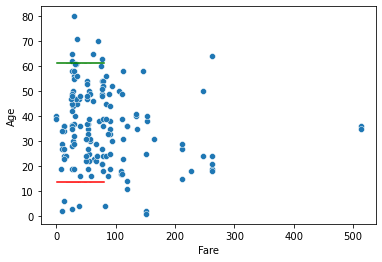

In [108]:
sns.scatterplot(x = df['Fare'], y = df['Age'])
sns.lineplot(x = df['Age'], y = pl, color = 'red')
sns.lineplot(x = df['Age'], y = pu, color = 'green')

In [109]:
df['Age_pct'] = np.where(
    df['Age']<pl,
    pl,
    np.where(
        df['Age']>pu,
        pu,
        df['Age']
    )
)

In [110]:
df_sd = df[(df['Age']>=pl) & (df['Age']<=pu)]
df[['Age', 'Age_pct']].describe()

,Age,Age_pct
count,158.000000,158.000000
mean,35.692532,35.848734
std,15.640858,14.078677
min,0.920000,13.550000
25%,24.000000,24.000000
50%,35.500000,35.500000
75%,48.000000,48.000000
max,80.000000,61.150000


### Fare

<AxesSubplot:xlabel='Age', ylabel='Fare'>

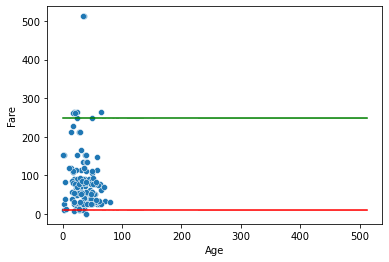

In [111]:
pl = np.nanpercentile(df['Fare'], 5)
pu = np.nanpercentile(df['Fare'], 95)
sns.scatterplot(x = df['Age'], y = df['Fare'])
sns.lineplot(x = df['Fare'], y = pl, color = 'red')
sns.lineplot(x = df['Fare'], y = pu, color = 'green')

In [112]:
df['Fare_pct'] = np.where(
    df['Fare']<pl,
    pl,
    np.where(
        df['Fare']>pu,
        pu,
        df['Fare']
    )
)

In [113]:
df_sd = df[(df['Fare']>=pl) & (df['Fare']<=pu)]
df[['Fare', 'Fare_pct']].describe()

,Fare,Fare_pct
count,175.000000,175.000000
mean,78.959191,75.607665
std,77.026328,62.250726
min,0.000000,10.500000
25%,29.700000,29.700000
50%,56.929200,56.929200
75%,90.539600,90.539600
max,512.329200,247.520800


## Pregunta 5

In [127]:
df_c = df_c.join(df[['Age_mean', 'Age_median','Age_mode', 'Age_lm']], on='PassengerId', how='outer', rsuffix='_y')
df[['Age', 'Age_mean', 'Age_median','Age_mode', 'Age_lm']].describe()

,Age,Age_mean,Age_median,Age_mode,Age_lm
count,158.000000,183.000000,183.00000,183.000000,183.000000
mean,35.692532,35.692532,35.66623,34.095191,35.582575
std,15.640858,14.526959,14.52711,15.074700,4.890669
min,0.920000,0.920000,0.92000,0.920000,32.176129
25%,24.000000,25.000000,25.00000,24.000000,32.176129
50%,35.500000,35.692532,35.50000,31.000000,32.176129
75%,48.000000,46.500000,46.50000,46.500000,42.565789
max,80.000000,80.000000,80.00000,80.000000,42.565789


En Age, el más cercano en el promedio fue la imputación por la media